In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
df = geneinfo.load_gene_file("../../")

In [5]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
#tsaba.load_ge_pickle(path=data_dir)

In [6]:
term = 'reward'
tsaba.is_term(term)

True

In [8]:
tsaba.estimate_aba_ge([6531])

In [9]:
analy = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


In [10]:
%%time
tsaba.estimate_ns_act(term, rnn_args={"radius":3})

CPU times: user 1.87 s, sys: 203 ms, total: 2.07 s
Wall time: 2.07 s


t-value: -4.4023 
p-value: 1.203E-05
Effect size: -0.4959
Control/Functional Split: 790/88



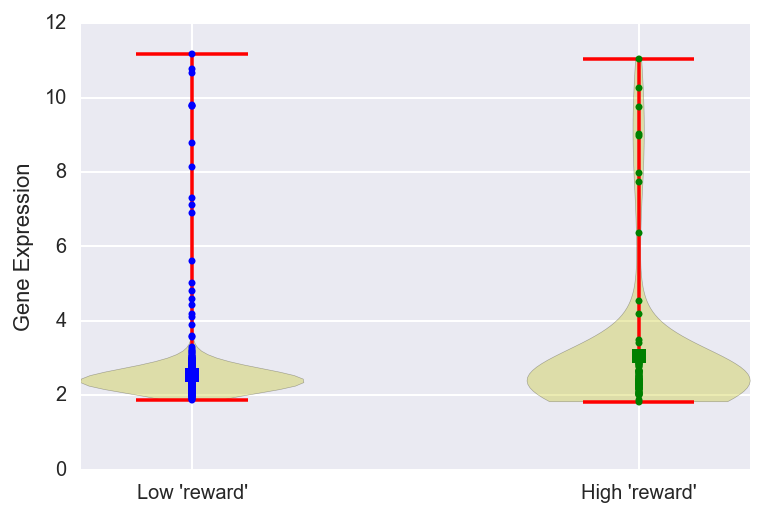

In [12]:
analy.term_ge_ttest(term, 6531, split_method='quant', graphops='violin', quant=90)

In [17]:
ttest_metr = analy.term_ge_ttest_multi(term, quant=90)

This may take a couple of minutes ...


In [18]:
fetch = False
if fetch:
    eids = geneinfo.fetch_entrez_ids("reward", 5)
    eids = [int(eid) for eid in eids]

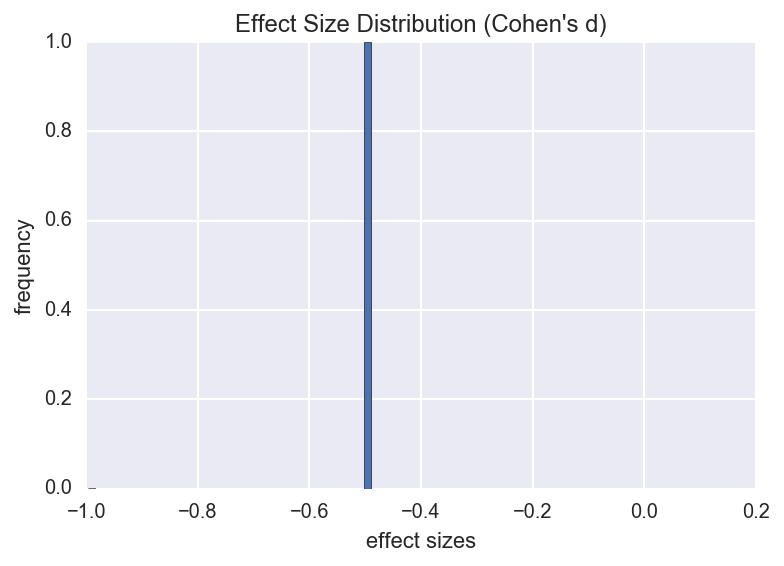

In [20]:
analy.cohen_d_distr(ttest_metr, genes_of_interest=eids)

In [ ]:
analy.p_val_distr(ttest_metr)n

In [ ]:
analy.fetch_gene_descriptions(ttest_metr, csv_path="../../", nih_fetch_num=35)

In [ ]:
r_vals = analy.term_ge_spearman_rho(term)

In [ ]:
analy.rho_distr(r_vals, genes_of_interest=eids)

In [ ]:
analy.fetch_gene_descriptions(r_vals, coeff='spearman', csv_path="../..")